# Import Dataset

In [1]:
import pandas as pd

In [2]:
file_path = "./data/IMDB Dataset.csv"
df = pd.read_csv(file_path)

# Explore Dataset 

In [3]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

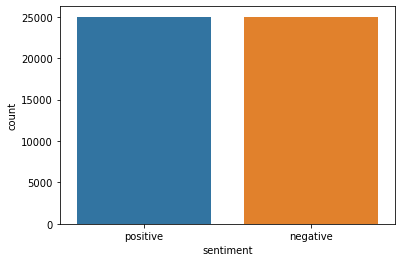

In [4]:
sns.countplot(x="sentiment", data=df)

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

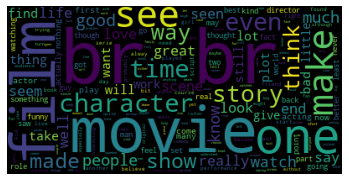

In [6]:
all_reviews = df["review"].tolist()
all_reviews_as_one_string = " ".join(all_reviews)
plt.imshow(WordCloud().generate(all_reviews_as_one_string))
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

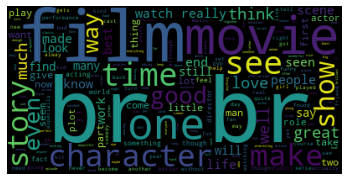

In [7]:
positive_reviews = df.loc[df['sentiment'] == "positive", "review"].tolist()
positive_reviews_as_one_string = " ".join(positive_reviews)
plt.imshow(WordCloud().generate(positive_reviews_as_one_string))
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

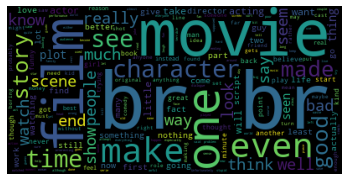

In [8]:
negative_reviews = df.loc[df['sentiment'] == "negative", "review"].tolist()
negative_reviews_as_one_string = " ".join(negative_reviews)
plt.imshow(WordCloud().generate(negative_reviews_as_one_string))
plt.axis("off")

# Preprocessing

In [9]:
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')

In [10]:
STOP_WORDS = nltk.corpus.stopwords.words('english')
print(len(STOP_WORDS))
print(STOP_WORDS)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [11]:
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


In [12]:
def preprocessing(text):
    text = re.sub(r'[0-9]+', '', text)   # 移除數字
    text = re.sub(r'[^\w\s]', ' ', text) # 移除標點符號
    text = text.lower()                  # 小寫
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in "br"]    # 移除 br
    # tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]   # lemmatization
    # for i in range(0, len(tokens)- 1):
    #     if tokens[i] == "t":
    #         tokens[i] = "NOT_"
    # tokens = [token for token in tokens if token not in STOP_WORDS]      # 移除停用詞
    return tokens

In [13]:
df_clean = df["review"].apply(preprocessing)

In [14]:
def join_word(word_list):
    return ' '.join(word_list)
df_clean_joined = df_clean.apply(join_word)
df_clean_joined

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

(-0.5, 399.5, 199.5, -0.5)

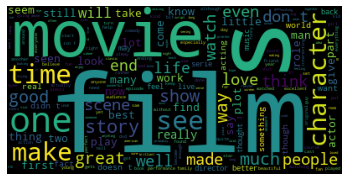

In [15]:
positive_reviews_clean = df_clean_joined[df['sentiment'] == "positive"].tolist()
positive_reviews_clean_as_one_string = " ".join(positive_reviews_clean)
plt.imshow(WordCloud().generate(positive_reviews_clean_as_one_string))
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

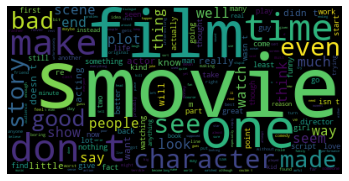

In [16]:
negative_reviews_clean = df_clean_joined[df['sentiment'] == "negative"].tolist()
negative_reviews_clean_as_one_string = " ".join(negative_reviews_clean)
plt.imshow(WordCloud().generate(negative_reviews_clean_as_one_string))
plt.axis("off")

In [17]:
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
wv_size = 200
w2v_model = Word2Vec(sentences=df_clean, vector_size=wv_size)

In [19]:
tfidf_vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
X_tfidf = tfidf_vectorizer.fit_transform(df_clean_joined)
tfidf = dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))
tfidf

{'__': 11.12665110365034,
 '___': 10.721185995542177,
 '____': 9.873888135154973,
 '_____': 10.433503923090395,
 '______': 10.721185995542177,
 '_______': 11.12665110365034,
 '________': 10.721185995542177,
 '_________': 11.12665110365034,
 '_____________________________': 11.12665110365034,
 '____________________________________': 11.12665110365034,
 '_____________________________________': 11.12665110365034,
 '______________________________________': 11.12665110365034,
 '______________________________________________': 11.12665110365034,
 '________________________________________________________________': 11.12665110365034,
 '__________________________________________________________________': 10.721185995542177,
 '___is': 11.12665110365034,
 '_a': 10.433503923090395,
 '_about_': 11.12665110365034,
 '_absolute': 11.12665110365034,
 '_absurdism': 11.12665110365034,
 '_all_': 11.12665110365034,
 '_almost_': 11.12665110365034,
 '_am_': 11.12665110365034,
 '_amadeus_': 11.12665110365034,

In [20]:
import numpy as np
def build_word_vector(sentence, wv_size):
    vec = np.zeros(wv_size)
    count = 0
    for token in sentence.split():
        try:
            vec += np.array(w2v_model.wv[token]) * tfidf[token]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [21]:
X = list()
for i in range(0,len(df_clean_joined.index)):
    X.append(build_word_vector(df_clean_joined[i], wv_size))

In [22]:
Y = [1 if df.loc[i, "sentiment"] == "positive" else 0 for i in range(0,len(df.index))]

In [23]:
X

[array([-0.12996924, -0.28026267,  0.3234671 , -0.83733677,  0.10503329,
        -0.4000979 , -0.60396934, -0.88460017,  0.31789519, -0.72866726,
         1.2606196 ,  0.08603448, -1.11076568,  0.49845093,  1.25068777,
         0.27924958, -0.49371853,  0.63591419,  0.24303603,  0.32177852,
         0.63400836,  0.64658554,  0.81315996, -0.2244212 ,  0.23337237,
         0.31181766,  1.05590206, -0.11090229, -0.79277095,  0.33379073,
         0.44554429,  0.98944552, -0.09082036, -0.63261346,  0.79054761,
         0.29636215, -0.98327618,  0.20991465, -0.03069356, -0.27704606,
        -0.71790758,  0.47989823,  1.12380016, -0.01843109,  0.49194728,
         0.11634163, -1.4365236 ,  0.31680149,  0.81313616, -0.15541463,
         0.44586474,  0.40497031, -1.30644559,  1.3448635 ,  0.10288795,
         1.00520237,  0.06092712,  1.37771271,  0.19737616,  0.08240388,
        -0.23816968,  0.32879062, -0.45668555, -0.0450486 ,  0.56174381,
         0.88678277,  1.09244001,  0.00653037,  0.5

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
std_scaler= StandardScaler()
std_scaled_X = std_scaler.fit_transform(X)
std_scaled_X

array([[ 5.17780615e-01,  2.98173187e-01,  8.41428369e-01, ...,
        -1.00100986e+00, -2.36063000e-01, -1.53332937e+00],
       [-7.00832719e-01,  9.20141670e-01, -1.73005330e+00, ...,
        -2.19030947e+00, -1.06139783e+00,  3.04344950e-05],
       [ 5.41503280e-01,  8.57912335e-01, -1.01657179e-01, ...,
         3.80197565e-01,  8.37869689e-01,  7.35059010e-01],
       ...,
       [ 1.15383833e+00,  2.04211872e+00, -8.13454884e-01, ...,
        -8.64871671e-01,  1.33292174e+00,  3.44725727e-01],
       [-1.00986184e-01, -4.03593965e-01, -2.91113681e-01, ...,
        -5.35077674e-01, -5.22366196e-01,  3.58125602e-01],
       [-1.24273276e+00, -1.15863291e+00,  1.33087855e+00, ...,
         5.34422592e-01,  1.78538706e-01, -4.37605857e-01]])

# Classification

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [27]:
from sklearn.svm import SVC
svm_clf_std_scaler = SVC()
Y_pred = cross_val_predict(svm_clf_std_scaler, std_scaled_X, Y, cv=5)
confusion_matrix(Y, Y_pred)

array([[21692,  3308],
       [ 2902, 22098]], dtype=int64)

In [107]:
svm_clf_std_scaler.fit(std_scaled_X, Y)

SVC()

In [108]:
text_1 = "This Spiderman is really fantastic. It captivated me right from the start, and I was entranced every second."
processed_token_list_1 = preprocessing(text_1)
processed_text_1 = join_word(processed_token_list_1)
X_new_1 = build_word_vector(processed_text_1, wv_size)
X_new_1 = X_new_1.reshape(1, -1)

In [109]:
y_pred_1 = svm_clf_std_scaler.predict(X_new_1)
y_pred_1


array([1])

In [110]:
text_2 = "Another worst action film! Full of annoying overuse scene, and not intense action scene! Not recommended!"
processed_token_list_2 = preprocessing(text_2)
processed_text_2 = join_word(processed_token_list_2)
X_new_2 = build_word_vector(processed_text_2, wv_size)
X_new_2 = X_new_2.reshape(1, -1)

In [111]:
y_pred_2 = svm_clf_std_scaler.predict(X_new_2)
y_pred_2

array([0])

In [112]:
text_3 = "Encanto is a creative movie featuring beautiful and vibrant animation. However, the story feels a little underdeveloped. While there are some magical and emotional moments, it seems as if they didn't know how to end the movie."
processed_token_list_3 = preprocessing(text_3)
processed_text_3 = join_word(processed_token_list_3)
X_new_3 = build_word_vector(processed_text_3, wv_size)
X_new_3 = X_new_3.reshape(1, -1)

In [113]:
y_pred_3 = svm_clf_std_scaler.predict(X_new_3)
y_pred_3

array([1])